In [431]:
# import libraries
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [432]:
# for t test
def pvalue_eval(pval, a=.05):
    if pval<a :
        return f"{pval} ({pval:0.6f}) is Statistically Significant (reject the null hypothesis)"
    return f"{pval} ({pval:0.6f}) is Statistically Non-Significant (failed to reject the null hypothesis)"

In [433]:
# read in files
student_df = pd.read_csv("Resources/Student Mental health.csv")
academic_performance_df = pd.read_csv("Resources/Effects on Academic Performance.csv")

In [434]:
# CLEANING DATA

In [435]:
# show column names
student_columns = student_df.columns
student_columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [436]:
student_df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/20 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/20 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/20 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/20 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/20 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [437]:
# rename columns
student_df.columns = ['Timestamp', 'Gender', 'Age', 'Course',
       'Year', 'GPA', 'Marital_status',
       'Depression', 'Anxiety',
       'Panic_attack',
       'Specialist_visit']

In [438]:
# delete timestamp column
del student_df['Timestamp']

In [439]:
student_df.head()

,Gender,Age,Course,Year,GPA,Marital_status,Depression,Anxiety,Panic_attack,Specialist_visit
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [440]:
# count how many total students
total_students = len(student_df["Gender"])
total_students

101

In [441]:
# make sure every column has same count
student_df.count()

Gender              101
Age                 100
Course              101
Year                101
GPA                 101
Marital_status      101
Depression          101
Anxiety             101
Panic_attack        101
Specialist_visit    101
dtype: int64

In [442]:
# see data types
# student_df.dtypes

In [443]:
# count male vs female
student_df["Gender"].value_counts()

Female    75
Male      26
Name: Gender, dtype: int64

In [444]:
# show different courses
student_df["Course"].value_counts()

BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [445]:
# Clean up Course column
student_df['Course'] = student_df['Course'].replace({'Koe': 'KOE','koe': 'KOE'})
student_df['Course'] = student_df['Course'].replace({'benl': 'BENL', 'Benl': 'BENL'})
student_df['Course'] = student_df['Course'].replace({'engin': 'Engineering','Engine': 'Engineering'})
student_df['Course'] = student_df['Course'].replace({'KIRKHS': 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'Islamic education': 'Islamic Education'})
student_df['Course'] = student_df['Course'].replace({'Laws': 'Law'})
student_df['Course'] = student_df['Course'].replace({'Pendidikan islam': 'Pendidikan Islam', 'Pendidikan Islam ': 'Pendidikan Islam'})
student_df['Course'] = student_df['Course'].replace({'Diploma Nursing': 'Nursing', 'Nursing ': 'Nursing'})
student_df['Course'] = student_df['Course'].replace({'Fiqh' : 'Fiqh Fatwa ', 'Fiqh Fatwa': 'Fiqh Fatwa'})
student_df['Course'] = student_df['Course'].replace({'Econs' : 'Econ'})
student_df['Course'] = student_df['Course'].replace({'Irkhs' : 'Kirkhs'})
student_df['Course'] = student_df['Course'].replace({'ENM' : 'KENMS'})
student_df['Course'] = student_df['Course'].replace({'psychology' : 'Psychology'})

In [446]:
student_df["Course"].value_counts()

Engineering                20
BCS                        18
BIT                        10
KOE                         6
Biomedical science          4
Law                         3
Pendidikan Islam            3
BENL                        3
Kirkhs                      3
Psychology                  3
KENMS                       2
Nursing                     2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Radiography                 1
Biotechnology               1
Communication               1
Econ                        1
Fiqh fatwa                  1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
IT                          1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
Accounting                  1
Human Resources             1
Mathemathi

In [447]:
# clean up Year column
student_df["Year"].value_counts()

year 1    41
Year 3    19
Year 2    16
year 2    10
year 4     8
year 3     5
Year 1     2
Name: Year, dtype: int64

In [448]:
student_df['Year'] = student_df['Year'].replace({'year 1': 'Year 1'})
student_df['Year'] = student_df['Year'].replace({'year 2': 'Year 2'})
student_df['Year'] = student_df['Year'].replace({'year 3': 'Year 3'})

In [449]:
student_df["Year"].value_counts()

Year 1    43
Year 2    26
Year 3    24
year 4     8
Name: Year, dtype: int64

In [450]:
# clean up GPA column
student_df["GPA"].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: GPA, dtype: int64

In [451]:
student_df['GPA'] = student_df['GPA'].replace({'3.50 - 4.00 ': '3.50 - 4.00'})

In [452]:
student_df["GPA"].value_counts()

3.50 - 4.00    48
3.00 - 3.49    43
2.50 - 2.99     4
0 - 1.99        4
2.00 - 2.49     2
Name: GPA, dtype: int64

In [453]:
##### OTHER SPREADSHEET 

In [454]:
academic_performance_df.head()

,Gender:,Age:,Educational Level,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or not have let yourself or your family down,"Trouble concentrating on things, such as reading the newspaper or watching television",Moving or speaking so slowly that other people could have noticed Or being so restless that you have been moving around a lot more than usual,Thoughts that you would be better off dead or of hurting yourself in some way,Do you have part-time or full-time job?,Which of the following best describes your term-time accommodation?,How many hours do you spend studying each day?,"How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?",How many hours do you spend on social media per day?,Your Last Semester GPA:
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
2,Female,18 years or less,High School,2,2,2,2,1,1,2,2,1,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97
3,Female,18 years or less,High School,3,1,2,3,3,1,1,1,2,No,Home (with parents),1 - 2 hours,More than 6,2 - 4 Hours,2.74
4,Male,18 years or less,High School,1,2,2,3,1,1,3,1,1,Part time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.37


In [455]:
# CLEANING DATA 

In [456]:
# rename columns
rename_academic_df = academic_performance_df.rename(columns = {'Gender:':'gender', 'Age:':'age',
                                     'Educational Level':'educational_level',
                                     'Little interest or pleasure in doing things ':'interest_level',
                                     'Feeling down, depressed, or hopeless':'depressed_level',
                                     'Trouble falling or staying asleep, or sleeping too much':'sleepy_level',
                                     'Feeling tired or having little energy':'energy_level',
                                     'Poor appetite or overeating':'appetite_level',
                                     'Feeling bad about yourself or that you are a failure or not have let yourself or your family down':'self_worth_level',
                                     'Trouble concentrating on things, such as reading the newspaper or watching television':'concentrating_level',
                                     'Moving or speaking so slowly that other people could have noticed Or being so restless that you have been moving around a lot more than usual':'restless_level',
                                     'Thoughts that you would be better off dead or of hurting yourself in some way':'suicidal_level',
                                     'Do you have part-time or full-time job? ':'employment',
                                     'Which of the following best describes your term-time accommodation?':'housing_situation',
                                     'How many hours do you spend studying each day?':'studying_spending',
                                     'How many of the electronic gadgets (e.g. mobile phone, computer, laptop, PSP, PS4, Wii, etc.) do you have in your home or your student accommodation/mess/hall?':'electronic_devices',
                                     'How many hours do you spend on social media per day?':'social_media_time',
                                     'Your Last Semester GPA: ':'GPA'})

In [457]:
# look at count to ensure each column has same number of rows 
rename_academic_df.count()

gender                 352
age                    352
educational_level      352
interest_level         352
depressed_level        352
sleepy_level           352
energy_level           352
appetite_level         352
self_worth_level       352
concentrating_level    352
restless_level         352
suicidal_level         352
employment             352
housing_situation      352
studying_spending      352
electronic_devices     352
social_media_time      352
GPA                    352
dtype: int64

In [458]:
# filter to show only "College - Bachelor's"
rename_academic_df['educational_level'].value_counts()

College - Bachelor's    204
High School             124
Master                   24
Name: educational_level, dtype: int64

In [459]:
bachelors_df = rename_academic_df.loc[rename_academic_df['educational_level'] == "College - Bachelor's"]
bachelors_df.head()

,gender,age,educational_level,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level,employment,housing_situation,studying_spending,electronic_devices,social_media_time,GPA
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
6,Female,19 to 24 years,College - Bachelor's,2,2,3,3,1,1,2,2,1,Part time,Home (with parents),1 - 2 hours,4 - 6,2 - 4 Hours,2.75
8,Female,19 to 24 years,College - Bachelor's,3,1,4,3,1,2,1,1,1,Full time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.97
10,Female,19 to 24 years,College - Bachelor's,2,4,4,3,2,3,4,1,3,No,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97


In [460]:
# clean up employment column
bachelors_df['employment'].value_counts()

Full Time    83
No           53
Part time    51
Full time    17
Name: employment, dtype: int64

In [461]:
bachelors_df["employment"] = bachelors_df["employment"].replace({'Full Time': 'Full time', 'No': 'Unemployed'})

/var/folders/s8/06x09z5j12g_t79tbrhn448w0000gn/T/ipykernel_92029/876268993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bachelors_df["employment"] = bachelors_df["employment"].replace({'Full Time': 'Full time', 'No': 'Unemployed'})


In [462]:
bachelors_df['employment'].value_counts()

Full time     100
Unemployed     53
Part time      51
Name: employment, dtype: int64

In [463]:
# reset index 
bachelors_df = bachelors_df.reset_index(drop = True)

In [464]:
bachelors_df

,gender,age,educational_level,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level,employment,housing_situation,studying_spending,electronic_devices,social_media_time,GPA
0,Male,19 to 24 years,College - Bachelor's,3,2,4,4,3,3,4,3,2,Part time,Home (with parents),2 - 4 hours,4 - 6,More than 4 Hours,2.30
1,Male,19 to 24 years,College - Bachelor's,2,1,2,1,1,1,1,1,1,Part time,University hall of residence,1 - 2 hours,1 - 3,1 - 2 Hours,2.70
2,Female,19 to 24 years,College - Bachelor's,2,2,3,3,1,1,2,2,1,Part time,Home (with parents),1 - 2 hours,4 - 6,2 - 4 Hours,2.75
3,Female,19 to 24 years,College - Bachelor's,3,1,4,3,1,2,1,1,1,Full time,Home (with parents),1 - 2 hours,4 - 6,More than 4 Hours,3.97
4,Female,19 to 24 years,College - Bachelor's,2,4,4,3,2,3,4,1,3,Unemployed,Home (with parents),1 - 2 hours,1 - 3,More than 4 Hours,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Female,25 years and above,College - Bachelor's,4,3,4,4,4,4,4,3,2,Full time,Private rented accommodation,2 - 4 hours,4 - 6,2 - 4 Hours,1.30
200,Female,19 to 24 years,College - Bachelor's,4,4,2,4,3,4,4,3,2,Unemployed,Home (with parents),2 - 4 hours,1 - 3,2 - 4 Hours,4.00
201,Female,25 years and above,College - Bachelor's,4,4,2,2,2,2,2,2,3,Full time,Home (with parents),More than 4 hours,1 - 3,More than 4 Hours,4.00
202,Female,19 to 24 years,College - Bachelor's,3,3,3,3,3,3,3,3,2,Full time,Private rented accommodation,2 - 4 hours,4 - 6,2 - 4 Hours,3.35


In [465]:
## CLAIRE QUESTION

# Does living at home with parents affect a college students mental health 
    #(depression level, interest level, sleepy level, energy level, appetite level, self-worth level, 
        # concentrating level, restless level, and suicidal level)?
        
# Null: If mental health is not related to a college students living situation, 
    # then mental health levels will be the same in students living at home compared to 
    # students living in private accommodations.
    
# Alternate: If mental health is related to a college students living situation, 
    # then a student living at home with parents will report greater mental health problems 
    # than a student living in private accommodations.

In [466]:
# make a new dataframe only with columns i'm interested in 
living_df = bachelors_df[["housing_situation", "interest_level", "depressed_level", "sleepy_level", 
                          "energy_level", "appetite_level", "self_worth_level", "concentrating_level", 
                          "restless_level", "suicidal_level"]]
living_df

,housing_situation,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level
0,Home (with parents),3,2,4,4,3,3,4,3,2
1,University hall of residence,2,1,2,1,1,1,1,1,1
2,Home (with parents),2,2,3,3,1,1,2,2,1
3,Home (with parents),3,1,4,3,1,2,1,1,1
4,Home (with parents),2,4,4,3,2,3,4,1,3
...,...,...,...,...,...,...,...,...,...,...
199,Private rented accommodation,4,3,4,4,4,4,4,3,2
200,Home (with parents),4,4,2,4,3,4,4,3,2
201,Home (with parents),4,4,2,2,2,2,2,2,3
202,Private rented accommodation,3,3,3,3,3,3,3,3,2


In [467]:
# look at different housing siutations
living_df["housing_situation"].value_counts()

Private rented accommodation    114
Home (with parents)              89
University hall of residence      1
Name: housing_situation, dtype: int64

In [468]:
# only look at private rented accomodation and home (with parents)
filtered_df = living_df.loc[living_df["housing_situation"].isin(["Private rented accommodation", "Home (with parents)"])]
filtered_df

,housing_situation,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level
0,Home (with parents),3,2,4,4,3,3,4,3,2
2,Home (with parents),2,2,3,3,1,1,2,2,1
3,Home (with parents),3,1,4,3,1,2,1,1,1
4,Home (with parents),2,4,4,3,2,3,4,1,3
5,Private rented accommodation,1,1,1,1,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
199,Private rented accommodation,4,3,4,4,4,4,4,3,2
200,Home (with parents),4,4,2,4,3,4,4,3,2
201,Home (with parents),4,4,2,2,2,2,2,2,3
202,Private rented accommodation,3,3,3,3,3,3,3,3,2


In [469]:
# check to make sure University hall of residence was dropped
filtered_df["housing_situation"].value_counts()

Private rented accommodation    114
Home (with parents)              89
Name: housing_situation, dtype: int64

In [470]:
# new data frame for private accomodation
# private_df = filtered_df.loc[living_df["housing_situation"] == "Private rented accommodation"]

# reset index 
# private_df = private_df.reset_index(drop = True)

# private_df

In [471]:
# obtain summary stastistics
# private_df.describe()

In [472]:
# new data frame for home (with parents) accomodation
# home_df = filtered_df.loc[living_df["housing_situation"] == "Home (with parents)"]
# home_df = home_df.reset_index(drop = True)
# home_df

In [473]:
# obtain summary statistics
# home_df.describe()

In [474]:
# look at percentage of students living at home vs private 
private_students = filtered_df.loc[living_df["housing_situation"] == "Private rented accommodation"]
private_students_count = len(private_students)

home_students = filtered_df.loc[living_df["housing_situation"] == "Home (with parents)"]
home_students_count = len(home_students)

In [475]:
total_student = len(living_df["housing_situation"])

In [476]:
percent_private = round(private_students_count / total_student *100, 2)
percent_home = round(home_students_count / total_student *100, 2)

In [477]:
housing_percent = [{"% Private": percent_private, "% Home": percent_home}]
housing_percent_df = pd.DataFrame(housing_percent)
housing_percent_df

,% Private,% Home
0,55.88,43.63


In [478]:
# make a pie chart 
data = [percent_private, percent_home]
labels = ["% Private", "% Home"]
colors = ["rosybrown", "thistle"]
explode = (0.05,0)

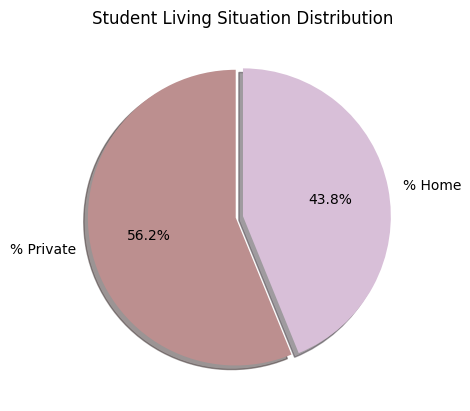

In [479]:
plt.pie(data, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Student Living Situation Distribution")
plt.show()

In [480]:
student_pie_output_file = "/Users/AttiasC16/Desktop/housing_pie.png"
plt.savefig(student_pie_output_file)
plt.show()

<Figure size 640x480 with 0 Axes>

In [481]:
## INTEREST LEVEL

In [482]:
# look at mean interest level per housing sitation
interest_avg = filtered_df.groupby(["housing_situation"]).mean()["interest_level"]
interest_avg

housing_situation
Home (with parents)             2.471910
Private rented accommodation    2.359649
Name: interest_level, dtype: float64

In [483]:
# run a t test to test for signigicance 
interest_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
interest_population1.interest_level.mean()

interest_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
interest_population2.interest_level.mean()

interest_ret = stats.ttest_ind(interest_population1.interest_level, interest_population2.interest_level, equal_var=False)
interest_ret

Ttest_indResult(statistic=-0.9000697438629391, pvalue=0.36922505353253854)

In [484]:
# t test summary
pvalue_eval(interest_ret[1])

'0.36922505353253854 (0.369225) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [485]:
## DEPRESSION LEVEL

In [486]:
# look at mean depression level per housing sitation
depressed_avg = filtered_df.groupby(["housing_situation"]).mean()["depressed_level"]
depressed_avg

housing_situation
Home (with parents)             2.292135
Private rented accommodation    2.236842
Name: depressed_level, dtype: float64

In [487]:
# run a t test to test for signigicance 
depressed_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
depressed_population1.depressed_level.mean()

depressed_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
depressed_population2.depressed_level.mean()

depressed_ret = stats.ttest_ind(depressed_population1.depressed_level, depressed_population2.depressed_level, equal_var=False)
depressed_ret

Ttest_indResult(statistic=-0.3834323801338354, pvalue=0.7018375346654766)

In [488]:
# t test summary
pvalue_eval(depressed_ret[1])

'0.7018375346654766 (0.701838) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [489]:
## SLEEPY LEVEL

In [490]:
# look at mean sleepy level per housing sitation
sleepy_avg = filtered_df.groupby(["housing_situation"]).mean()["sleepy_level"]
sleepy_avg

housing_situation
Home (with parents)             2.988764
Private rented accommodation    2.622807
Name: sleepy_level, dtype: float64

In [491]:
# run a t test to test for signigicance 
sleepy_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
sleepy_population1.sleepy_level.mean()

sleepy_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
sleepy_population2.sleepy_level.mean()

sleepy_ret = stats.ttest_ind(sleepy_population1.sleepy_level, sleepy_population2.sleepy_level, equal_var=False)
sleepy_ret

Ttest_indResult(statistic=-2.395793269047011, pvalue=0.01750430659230779)

In [492]:
# t test summary
pvalue_eval(sleepy_ret[1])

'0.01750430659230779 (0.017504) is Statistically Significant (reject the null hypothesis)'

In [493]:
## ENERGY LEVEL

In [494]:
# look at mean energy level per housing sitation
energy_avg = filtered_df.groupby(["housing_situation"]).mean()["energy_level"]
energy_avg

housing_situation
Home (with parents)             2.910112
Private rented accommodation    2.789474
Name: energy_level, dtype: float64

In [495]:
# run a t test to test for signigicance 
energy_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
energy_population1.energy_level.mean()

energy_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
energy_population2.energy_level.mean()

energy_ret = stats.ttest_ind(energy_population1.energy_level, energy_population2.energy_level, equal_var=False)
energy_ret

Ttest_indResult(statistic=-0.852352660331828, pvalue=0.3950451855472421)

In [496]:
# t test summary
pvalue_eval(energy_ret[1])

'0.3950451855472421 (0.395045) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [497]:
## APPETITE LEVEL

In [498]:
# look at mean appetite level per housing sitation
appetite_avg = filtered_df.groupby(["housing_situation"]).mean()["appetite_level"]
appetite_avg

housing_situation
Home (with parents)             2.606742
Private rented accommodation    2.561404
Name: appetite_level, dtype: float64

In [499]:
# run a t test to test for signigicance 
appetite_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
appetite_population1.appetite_level.mean()

appetite_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
energy_population2.appetite_level.mean()

appetite_ret = stats.ttest_ind(appetite_population1.appetite_level, appetite_population2.appetite_level, equal_var=False)
appetite_ret

Ttest_indResult(statistic=-0.2856802070070185, pvalue=0.7754306278723632)

In [500]:
# t test summary
pvalue_eval(appetite_ret[1])

'0.7754306278723632 (0.775431) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [501]:
## SELF-WORTH LEVEL

In [502]:
# look at mean self-worth level per housing sitation
self_worth_avg = filtered_df.groupby(["housing_situation"]).mean()["self_worth_level"]
self_worth_avg

housing_situation
Home (with parents)             2.595506
Private rented accommodation    2.377193
Name: self_worth_level, dtype: float64

In [503]:
# run a t test to test for signigicance 
self_worth_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
self_worth_population1.self_worth_level.mean()

self_worth_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
self_worth_population2.self_worth_level.mean()

self_worth_ret = stats.ttest_ind(self_worth_population1.self_worth_level, self_worth_population2.self_worth_level, equal_var=False)
self_worth_ret

Ttest_indResult(statistic=-1.420039487569023, pvalue=0.15717355408142206)

In [504]:
# t test summary
pvalue_eval(self_worth_ret[1])

'0.15717355408142206 (0.157174) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [505]:
## CONCENTRATING LEVEL

In [506]:
# look at mean concentrating level per housing sitation
concentrating_avg = filtered_df.groupby(["housing_situation"]).mean()["concentrating_level"]
concentrating_avg

housing_situation
Home (with parents)             2.202247
Private rented accommodation    2.175439
Name: concentrating_level, dtype: float64

In [507]:
# run a t test to test for signigicance 
concentrating_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
concentrating_population1.concentrating_level.mean()

concentrating_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
concentrating_population2.concentrating_level.mean()

concentrating_ret = stats.ttest_ind(concentrating_population1.concentrating_level, concentrating_population2.concentrating_level, equal_var=False)
concentrating_ret

Ttest_indResult(statistic=-0.17939118501625972, pvalue=0.8578188418389965)

In [508]:
# t test summary
pvalue_eval(concentrating_ret[1])

'0.8578188418389965 (0.857819) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [509]:
## RESTLESS LEVEL

In [510]:
# look at mean restless level per housing sitation
restless_avg = filtered_df.groupby(["housing_situation"]).mean()["restless_level"]
restless_avg

housing_situation
Home (with parents)             1.943820
Private rented accommodation    1.631579
Name: restless_level, dtype: float64

In [511]:
# run a t test to test for signigicance 
restless_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
restless_population1.restless_level.mean()

restless_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
restless_population2.restless_level.mean()

restless_ret = stats.ttest_ind(restless_population1.restless_level, restless_population2.restless_level, equal_var=False)
restless_ret

Ttest_indResult(statistic=-2.239344304127492, pvalue=0.026323110873723535)

In [512]:
# t test summary
pvalue_eval(restless_ret[1])

'0.026323110873723535 (0.026323) is Statistically Significant (reject the null hypothesis)'

In [513]:
## SUICIDAL LEVEL

In [514]:
# look at mean suicidal level per housing sitation
suicidal_avg = filtered_df.groupby(["housing_situation"]).mean()["suicidal_level"]
suicidal_avg

housing_situation
Home (with parents)             1.651685
Private rented accommodation    1.517544
Name: suicidal_level, dtype: float64

In [515]:
# run a t test to test for signigicance 
suicidal_population1 = filtered_df[filtered_df["housing_situation"] == "Private rented accommodation"]
suicidal_population1.suicidal_level.mean()

suicidal_population2 = filtered_df[filtered_df["housing_situation"] == "Home (with parents)"]
suicidal_population2.suicidal_level.mean()

suicidal_ret = stats.ttest_ind(suicidal_population1.suicidal_level, suicidal_population2.suicidal_level, equal_var=False)
suicidal_ret

Ttest_indResult(statistic=-1.0288985260149588, pvalue=0.3049540628442314)

In [516]:
# t test summary
pvalue_eval(suicidal_ret[1])

'0.3049540628442314 (0.304954) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [517]:
# create a new data frame with averages to turn into bar chart
averages_df = pd.DataFrame({"Average Interest": interest_avg, "Average Depression": depressed_avg, 
                     "Average Sleepy": sleepy_avg, "Average Energy": energy_avg, "Average Apetite": appetite_avg, 
                    "Avergae Self-Worth": self_worth_avg, "Average Concentrating": concentrating_avg, 
                     "Average Restless": restless_avg, "Average Suicidal": suicidal_avg})
averages_df

,Average Interest,Average Depression,Average Sleepy,Average Energy,Average Apetite,Avergae Self-Worth,Average Concentrating,Average Restless,Average Suicidal
housing_situation,,,,,,,,,
Home (with parents),2.471910,2.292135,2.988764,2.910112,2.606742,2.595506,2.202247,1.943820,1.651685
Private rented accommodation,2.359649,2.236842,2.622807,2.789474,2.561404,2.377193,2.175439,1.631579,1.517544


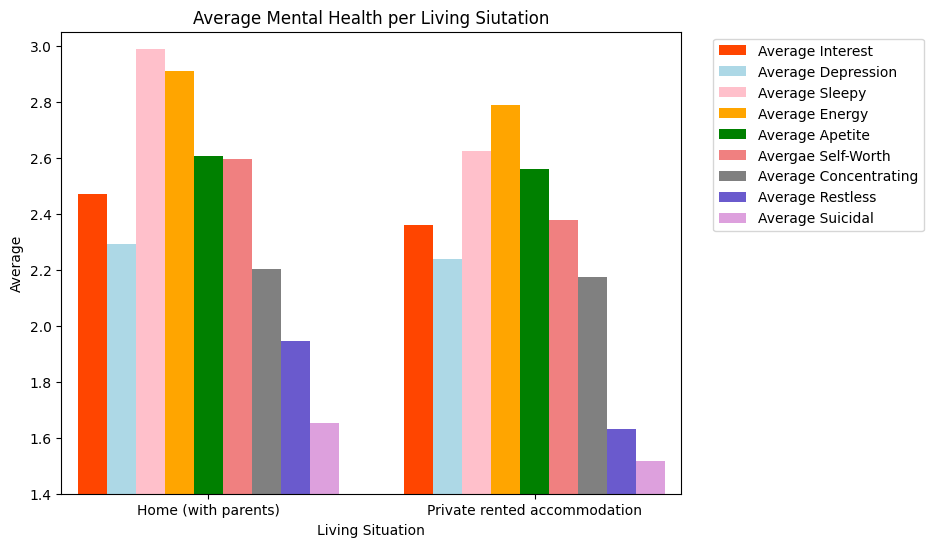

In [518]:
# create bar chart 
averages_bar = averages_df.plot(kind="bar", width=0.8, color=["orangered", "lightblue", "pink", "orange", "green", "lightcoral", "grey", "slateblue", "plum"], figsize=(8,6),
                                   title="Average Mental Health per Living Siutation",
                                   xlabel="Living Situation",
                                   ylabel="Average")

# Configure x-tick rotation
xticklabels = averages_df.index
averages_bar.set_xticklabels(xticklabels, rotation="horizontal", ha="center")

# formatting
plt.ylim(1.4, 3.05)
plt.xlim(-0.45, 1.45)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# Show plot
plt.show()

In [519]:
# save graph image to device
housing_bar_output_file = "/Users/AttiasC16/Desktop/housing_bar.png"
plt.savefig(housing_bar_output_file)
plt.show()

<Figure size 640x480 with 0 Axes>

In [520]:
## QUESTION 2

# Does employment status affect a college students mental health?
    #(depression level, interest level, sleepy level, energy level, appetite level, self-worth level, 
        # concentrating level, restless level, and suicidal level)?
        
# Null: If mental health is not related to a college students employment status, 
    # then mental health levels will be the same in full time, part time, and unemployed students.
    
# Alternate: If mental health is related to a college students employment status, 
    # then full time employed students will report greater mental health problems 
    # than part time employed students and unemployed students.

In [521]:
# make a new dataframe only with columns i'm interested in 
employment_df = bachelors_df[["employment", "interest_level", "depressed_level", "sleepy_level", 
                          "energy_level", "appetite_level", "self_worth_level", "concentrating_level", 
                          "restless_level", "suicidal_level"]]
employment_df.head()

,employment,interest_level,depressed_level,sleepy_level,energy_level,appetite_level,self_worth_level,concentrating_level,restless_level,suicidal_level
0,Part time,3,2,4,4,3,3,4,3,2
1,Part time,2,1,2,1,1,1,1,1,1
2,Part time,2,2,3,3,1,1,2,2,1
3,Full time,3,1,4,3,1,2,1,1,1
4,Unemployed,2,4,4,3,2,3,4,1,3


In [522]:
# clean column

In [523]:
employment_df["employment"].value_counts()

Full time     100
Unemployed     53
Part time      51
Name: employment, dtype: int64

In [524]:
# look at percentage of students living at home vs private 
full_time_students = employment_df.loc[employment_df["employment"] == "Full time"]
full_time_students_count = len(full_time_students)

part_time_students = employment_df.loc[employment_df["employment"] == "Part time"]
part_time_students_count = len(part_time_students)

unemployed_students = employment_df.loc[employment_df["employment"] == "Unemployed"]
unemployed_students_count = len(unemployed_students)

In [525]:
percent_full_time = round(full_time_students_count / total_student *100, 2)
percent_part_time = round(part_time_students_count / total_student *100, 2)
percent_unemployed = round(unemployed_students_count / total_student *100, 2)

In [526]:
employment_percent = [{"% Full time": percent_full_time, "% Part time": percent_part_time, "% Unemployed": percent_unemployed}]
employment_percent_df = pd.DataFrame(employment_percent)
employment_percent_df

,% Full time,% Part time,% Unemployed
0,49.02,25.0,25.98


In [527]:
# make a pie chart 
data = [percent_full_time, percent_part_time, percent_unemployed]
labels = ["% Full Time", "% Part Time", "% Unemployed"]
colors = ["indianred", "coral", "darksalmon"]
explode = (0.025, 0.025, 0.025)

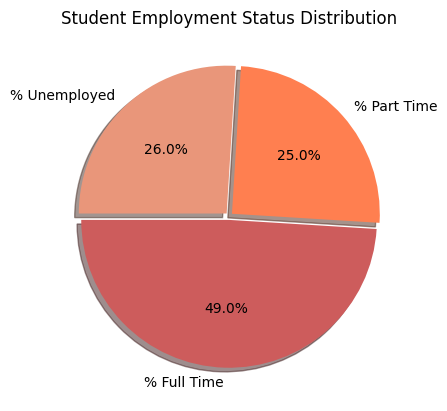

In [528]:
plt.pie(data, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Student Employment Status Distribution")
plt.show()

In [529]:
employment_pie_output_file = "/Users/AttiasC16/Desktop/employment_pie.png"
plt.savefig(employment_pie_output_file)
plt.show()

<Figure size 640x480 with 0 Axes>

In [530]:
## INTEREST LEVEL

In [531]:
# look at mean interest level per employment status
employ_interest_avg = employment_df.groupby(["employment"]).mean()["interest_level"]
employ_interest_avg

employment
Full time     2.380000
Part time     2.352941
Unemployed    2.509434
Name: interest_level, dtype: float64

In [532]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_interest_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_interest_population1.interest_level.mean()

employ_interest_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_interest_population2.interest_level.mean()

employ_interest_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_interest_population3.interest_level.mean()


employ_interest_ret = stats.f_oneway(employ_interest_population1.interest_level, employ_interest_population2.interest_level, employ_interest_population3.interest_level)
employ_interest_ret

F_onewayResult(statistic=0.4997947341852037, pvalue=0.607407074636415)

In [533]:
# ANOVA summary
pvalue_eval(employ_interest_ret[1])

'0.607407074636415 (0.607407) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [534]:
## DEPRESSED LEVEL

In [535]:
# look at mean depression level per employment status
employ_depressed_avg = employment_df.groupby(["employment"]).mean()["depressed_level"]
employ_depressed_avg

employment
Full time     2.200000
Part time     2.333333
Unemployed    2.283019
Name: depressed_level, dtype: float64

In [536]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_depressed_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_depressed_population1.depressed_level.mean()

employ_depressed_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_depressed_population2.depressed_level.mean()

employ_depressed_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_depressed_population3.depressed_level.mean()


employ_depressed_ret = stats.f_oneway(employ_depressed_population1.depressed_level, employ_depressed_population2.depressed_level, employ_depressed_population3.depressed_level)
employ_depressed_ret

F_onewayResult(statistic=0.3173334376366759, pvalue=0.7284520379776457)

In [537]:
# ANOVA summary
pvalue_eval(employ_depressed_ret[1])

'0.7284520379776457 (0.728452) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [538]:
## SLEEPY LEVEL

In [539]:
# look at mean sleepy level per employment status
employ_sleepy_avg = employment_df.groupby(["employment"]).mean()["sleepy_level"]
employ_sleepy_avg

employment
Full time     2.720000
Part time     2.568627
Unemployed    3.094340
Name: sleepy_level, dtype: float64

In [540]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_sleepy_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_sleepy_population1.sleepy_level.mean()

employ_sleepy_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_sleepy_population2.sleepy_level.mean()

employ_sleepy_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_sleepy_population3.sleepy_level.mean()


employ_sleepy_ret = stats.f_oneway(employ_sleepy_population1.sleepy_level, employ_sleepy_population2.sleepy_level, employ_sleepy_population3.sleepy_level)
employ_sleepy_ret

F_onewayResult(statistic=3.2279208256227676, pvalue=0.04170365253248798)

In [541]:
# ANOVA summary
pvalue_eval(employ_sleepy_ret[1])

'0.04170365253248798 (0.041704) is Statistically Significant (reject the null hypothesis)'

In [542]:
## ENERGY LEVEL

In [543]:
# look at mean energy level per employment status
employ_energy_avg = employment_df.groupby(["employment"]).mean()["energy_level"]
employ_energy_avg

employment
Full time     2.940000
Part time     2.686275
Unemployed    2.773585
Name: energy_level, dtype: float64

In [544]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_energy_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_energy_population1.energy_level.mean()

employ_energy_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_energy_population2.energy_level.mean()

employ_energy_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_energy_population3.energy_level.mean()


employ_energy_ret = stats.f_oneway(employ_energy_population1.energy_level, employ_energy_population2.energy_level, employ_energy_population3.energy_level)
employ_energy_ret

F_onewayResult(statistic=1.1634265056323496, pvalue=0.3145085886418397)

In [545]:
# ANOVA summary
pvalue_eval(employ_energy_ret[1])

'0.3145085886418397 (0.314509) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [546]:
## APPETITE LEVEL

In [547]:
# look at mean appetite level per employment status
employ_appetite_avg = employment_df.groupby(["employment"]).mean()["appetite_level"]
employ_appetite_avg

employment
Full time     2.620000
Part time     2.509804
Unemployed    2.547170
Name: appetite_level, dtype: float64

In [548]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_appetite_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_appetite_population1.appetite_level.mean()

employ_appetite_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_appetite_population2.appetite_level.mean()

employ_appetite_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_appetite_population3.appetite_level.mean()


employ_appetite_ret = stats.f_oneway(employ_appetite_population1.appetite_level, employ_appetite_population2.appetite_level, employ_appetite_population3.appetite_level)
employ_appetite_ret

F_onewayResult(statistic=0.17953302270819735, pvalue=0.835794211500579)

In [549]:
# ANOVA summary
pvalue_eval(employ_appetite_ret[1])

'0.835794211500579 (0.835794) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [550]:
## SELF-WORTH LEVEL

In [551]:
# look at mean self-worth level per employment status
employ_self_worth_avg = employment_df.groupby(["employment"]).mean()["self_worth_level"]
employ_self_worth_avg

employment
Full time     2.300000
Part time     2.529412
Unemployed    2.716981
Name: self_worth_level, dtype: float64

In [552]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_self_worth_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_self_worth_population1.self_worth_level.mean()

employ_self_worth_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_self_worth_population2.self_worth_level.mean()

employ_self_worth_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_self_worth_population3.self_worth_level.mean()


employ_self_worth_ret = stats.f_oneway(employ_self_worth_population1.self_worth_level, employ_self_worth_population2.self_worth_level, employ_self_worth_population3.self_worth_level)
employ_self_worth_ret

F_onewayResult(statistic=2.61102242088832, pvalue=0.07594992292695464)

In [553]:
# ANOVA summary
pvalue_eval(employ_self_worth_ret[1])

'0.07594992292695464 (0.075950) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [554]:
## CONCENTRATING LEVEL

In [555]:
# look at mean concentrating level per employment status
employ_concentrating_avg = employment_df.groupby(["employment"]).mean()["concentrating_level"]
employ_concentrating_avg

employment
Full time     2.110000
Part time     2.235294
Unemployed    2.264151
Name: concentrating_level, dtype: float64

In [556]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_concentrating_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_concentrating_population1.concentrating_level.mean()

employ_concentrating_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_concentrating_population2.concentrating_level.mean()

employ_concentrating_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_concentrating_population3.concentrating_level.mean()


employ_concentrating_ret = stats.f_oneway(employ_concentrating_population1.concentrating_level, employ_concentrating_population2.concentrating_level, employ_concentrating_population3.concentrating_level)
employ_concentrating_ret

F_onewayResult(statistic=0.45143222265463445, pvalue=0.6373595354405415)

In [557]:
# ANOVA summary
pvalue_eval(employ_concentrating_ret[1])

'0.6373595354405415 (0.637360) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [558]:
## RESTLESS LEVEL

In [559]:
# look at mean restless level per employment status
employ_restless_avg = employment_df.groupby(["employment"]).mean()["restless_level"]
employ_restless_avg

employment
Full time     1.670000
Part time     1.901961
Unemployed    1.811321
Name: restless_level, dtype: float64

In [560]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_restless_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_restless_population1.restless_level.mean()

employ_restless_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_restless_population2.restless_level.mean()

employ_restless_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_restless_population3.restless_level.mean()


employ_restless_ret = stats.f_oneway(employ_restless_population1.restless_level, employ_restless_population2.restless_level, employ_restless_population3.restless_level)
employ_restless_ret

F_onewayResult(statistic=1.0078304722839133, pvalue=0.36684690906162176)

In [561]:
# ANOVA summary
pvalue_eval(employ_restless_ret[1])

'0.36684690906162176 (0.366847) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [562]:
## SUICIDAL LEVEL

In [563]:
# look at mean self-worth level per employment status
employ_suicidal_avg = employment_df.groupby(["employment"]).mean()["suicidal_level"]
employ_suicidal_avg

employment
Full time     1.490000
Part time     1.764706
Unemployed    1.547170
Name: suicidal_level, dtype: float64

In [564]:
# run an ANOVA to test for signigicance (since 3 ore more populations)
employ_suicidal_population1 = employment_df[employment_df["employment"] == "Full time"]
employ_suicidal_population1.suicidal_level.mean()

employ_suicidal_population2 = employment_df[employment_df["employment"] == "Part time"]
employ_suicidal_population2.suicidal_level.mean()

employ_suicidal_population3 = employment_df[employment_df["employment"] == "Unemployed"]
employ_suicidal_population3.suicidal_level.mean()


employ_suicidal_ret = stats.f_oneway(employ_suicidal_population1.suicidal_level, employ_suicidal_population2.suicidal_level, employ_suicidal_population3.suicidal_level)
employ_suicidal_ret

F_onewayResult(statistic=1.5992214201683805, pvalue=0.20461381939180376)

In [565]:
# ANOVA summary
pvalue_eval(employ_suicidal_ret[1])

'0.20461381939180376 (0.204614) is Statistically Non-Significant (failed to reject the null hypothesis)'

In [566]:
# create a new data frame with averages to turn into bar chart
employ_averages_df = pd.DataFrame({"Average Interest": employ_interest_avg, "Average Depression": employ_depressed_avg,
                     "Average Sleepy": employ_sleepy_avg, "Average Energy": employ_energy_avg, "Average Apetite": employ_appetite_avg, 
                    "Avergae Self-Worth": employ_self_worth_avg, "Average Concentrating": employ_concentrating_avg, 
                     "Average Restless": employ_restless_avg, "Average Suicidal": employ_suicidal_avg})
employ_averages_df

,Average Interest,Average Depression,Average Sleepy,Average Energy,Average Apetite,Avergae Self-Worth,Average Concentrating,Average Restless,Average Suicidal
employment,,,,,,,,,
Full time,2.380000,2.200000,2.720000,2.940000,2.620000,2.300000,2.110000,1.670000,1.490000
Part time,2.352941,2.333333,2.568627,2.686275,2.509804,2.529412,2.235294,1.901961,1.764706
Unemployed,2.509434,2.283019,3.094340,2.773585,2.547170,2.716981,2.264151,1.811321,1.547170


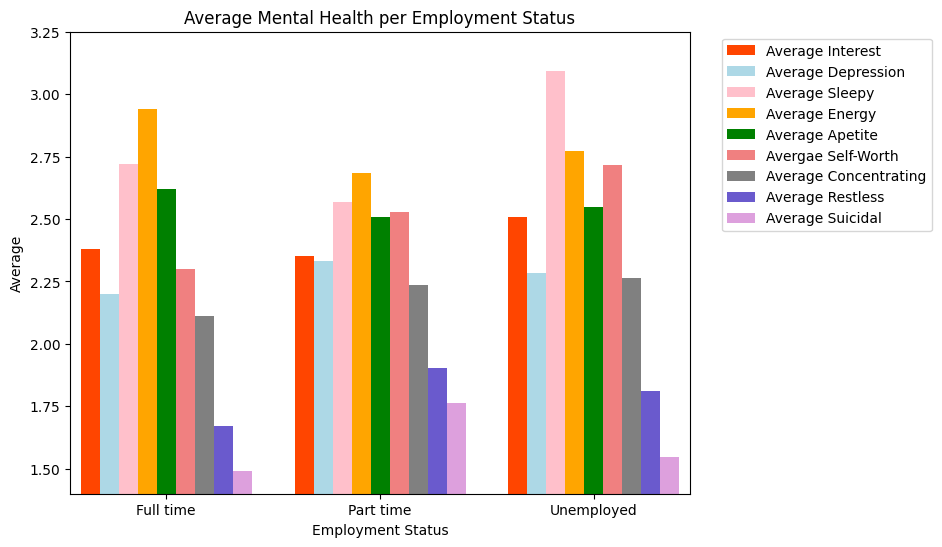

In [567]:
# create bar chart 
employ_averages_bar = employ_averages_df.plot(kind="bar", width=0.8, color=["orangered", "lightblue", "pink", "orange", "green", "lightcoral", "grey", "slateblue", "plum"], figsize=(8,6),
                                   title="Average Mental Health per Employment Status",
                                   xlabel="Employment Status",
                                   ylabel="Average")

# Configure x-tick rotation
xticklabels = employ_averages_df.index
employ_averages_bar.set_xticklabels(xticklabels, rotation="horizontal", ha="center")

# formatting
plt.ylim(1.4, 3.25)
plt.xlim(-0.45, 2.45)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

# Show plot
plt.show()

In [568]:
employment_bar_output_file = "/Users/AttiasC16/Desktop/employment_bar.png"
plt.savefig(employment_bar_output_file)
plt.show()

<Figure size 640x480 with 0 Axes>